In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file_path = "/content/Time_series_data_on_CPI_UNME.csv"
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   All India CPI(UNME)  608 non-null    object 
 1   Unnamed: 1           608 non-null    object 
 2   Unnamed: 2           0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 14.6+ KB


(None,
   All India CPI(UNME)  Unnamed: 1  Unnamed: 2
 0                 NaN         NaN         NaN
 1               Month  Urban Non-         NaN
 2                 NaN      Manual         NaN
 3                 NaN   Employees         NaN
 4                 NaN      (UNME)         NaN)

In [ ]:
df = df.iloc[:, :2]

In [ ]:
df.columns = ["Month", "CPI_UNME"]

In [ ]:
df = df.iloc[5:].reset_index(drop=True)

In [ ]:
df["CPI_UNME"] = pd.to_numeric(df["CPI_UNME"], errors='coerce')

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     600 non-null    object 
 1   CPI_UNME  600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


(None,
     Month  CPI_UNME
 0  Jan-61     100.0
 1  Feb-61     100.0
 2  Mar-61     101.0
 3  Apr-61     102.0
 4  May-61     102.0)

In [ ]:
df = df.sort_index()

In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries,  Apr 09 to Sep-99
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPI_UNME  600 non-null    float64
dtypes: float64(1)
memory usage: 9.4+ KB


(None,
          CPI_UNME
 Month            
 Apr 09      583.0
 Apr 10      667.0
 Aug 09      631.0
 Aug 10      696.0
 Dec 09      657.0)

In [ ]:
df["Month"].unique()[:20]

array(['Jan-61', 'Feb-61', 'Mar-61', 'Apr-61', 'May-61', 'Jun-61',
       'Jul-61', 'Aug-61', 'Sep-61', 'Oct-61', 'Nov-61', 'Dec-61',
       'Jan-62', 'Feb-62', 'Mar-62', 'Apr-62', 'May-62', 'Jun-62',
       'Jul-62', 'Aug-62'], dtype=object)

In [ ]:
df["Month"] = df["Month"].str.strip()

In [ ]:
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y", errors='coerce')

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.set_index("Month", inplace=True)
df = df.sort_index()

In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPI_UNME  600 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


(None,
    CPI_UNME
 0     583.0
 1     667.0
 2     631.0
 3     696.0
 4     657.0)

In [ ]:
df[df.index > pd.to_datetime("today")]

,CPI_UNME
Month,
2061-01-01,100.0
2061-02-01,100.0
2061-03-01,101.0
2061-04-01,102.0
2061-05-01,102.0
...,...
2068-08-01,163.0
2068-09-01,165.0
2068-10-01,164.0


In [ ]:
df.index.year.min(), df.index.year.max()

(np.int32(1969), np.int32(2068))

In [ ]:
df.index = df.index.map(lambda x: x - pd.DateOffset(years=100) if x.year > 2025 else x)
df.index.year.min(), df.index.year.max()

(1961, 2009)

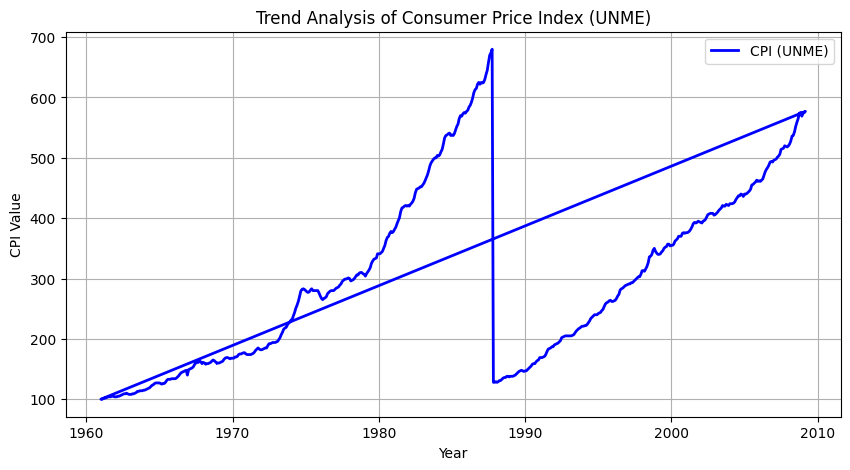

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["CPI_UNME"], label="CPI (UNME)", color="blue", linewidth=2)
plt.xlabel("Year")
plt.ylabel("CPI Value")
plt.title("Trend Analysis of Consumer Price Index (UNME)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df["Inflation_Rate"] = df["CPI_UNME"].pct_change(12) * 100

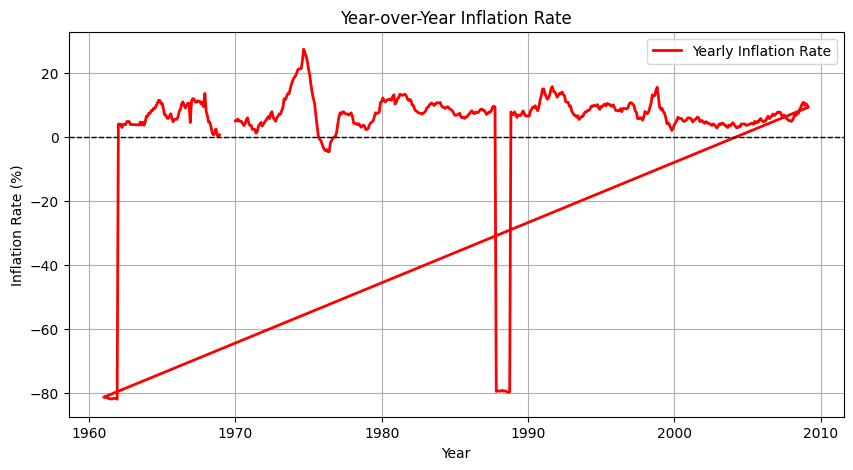

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Inflation_Rate"], label="Yearly Inflation Rate", color="red", linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0%
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("Year-over-Year Inflation Rate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
base_year = 2000
base_cpi = df.loc[pd.Timestamp(f"{base_year}-01-01"), "CPI_UNME"]

In [ ]:
df["CPI_Base_2000"] = (df["CPI_UNME"] / base_cpi) * 100

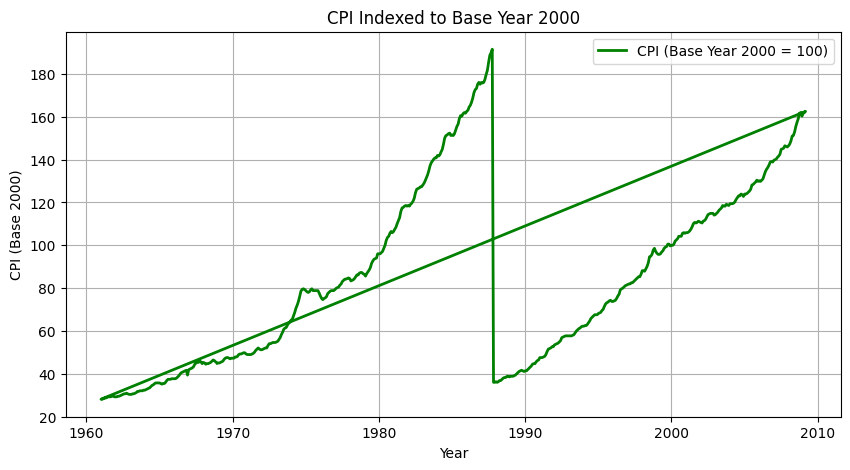

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["CPI_Base_2000"], label="CPI (Base Year 2000 = 100)", color="green", linewidth=2)
plt.xlabel("Year")
plt.ylabel("CPI (Base 2000)")
plt.title("CPI Indexed to Base Year 2000")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df["Month_Name"] = df.index.month_name()

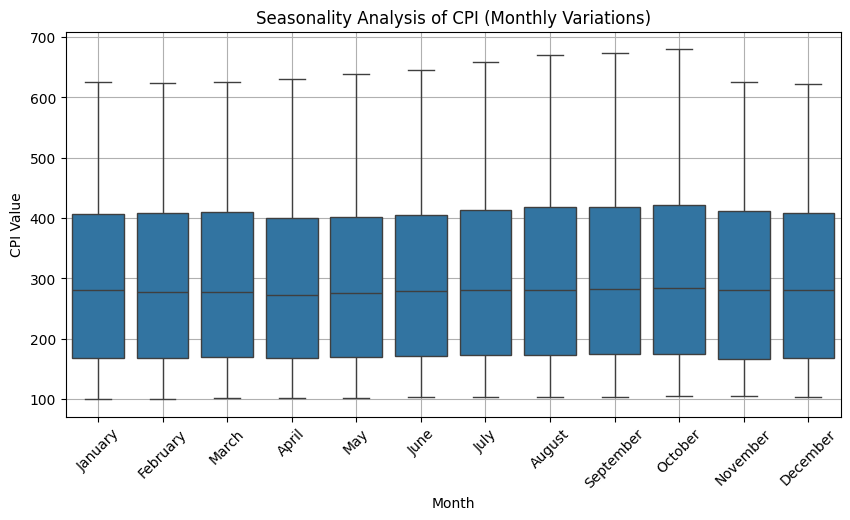

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Month_Name", y="CPI_UNME", data=df, order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])
plt.xlabel("Month")
plt.ylabel("CPI Value")
plt.title("Seasonality Analysis of CPI (Monthly Variations)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

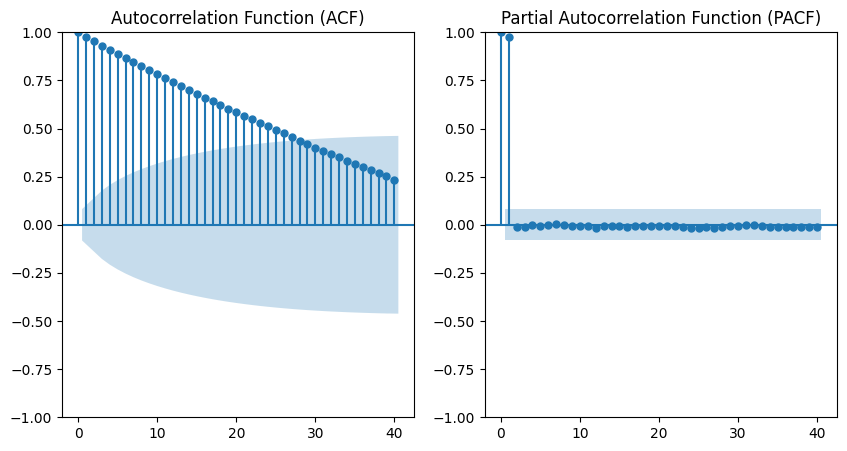

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(df["CPI_UNME"].dropna(), lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(df["CPI_UNME"].dropna(), lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

In [ ]:
model = ARIMA(df["CPI_UNME"], order=(1,1,1))
arima_result = model.fit()

In [ ]:
forecast_steps = 60
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_values = arima_result.forecast(steps=forecast_steps)

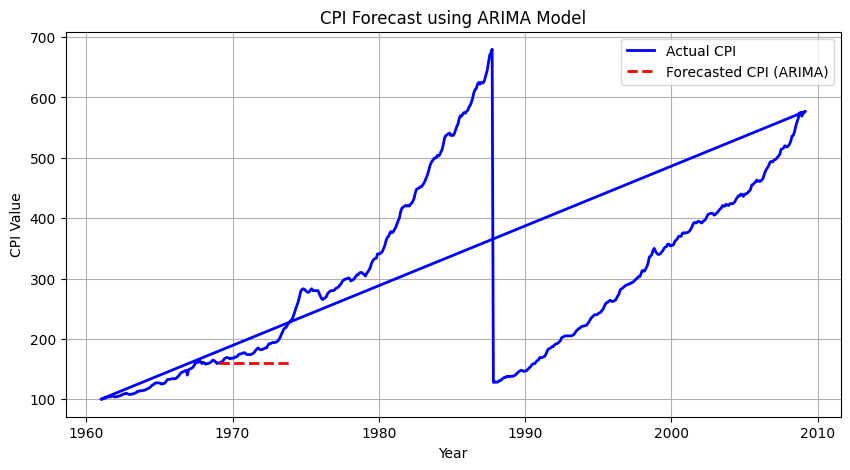

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["CPI_UNME"], label="Actual CPI", color="blue", linewidth=2)
plt.plot(forecast_index, forecast_values, label="Forecasted CPI (ARIMA)", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Year")
plt.ylabel("CPI Value")
plt.title("CPI Forecast using ARIMA Model")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df["CPI_Change"] = df["CPI_UNME"].diff()

In [ ]:
threshold = df["CPI_Change"].quantile(0.99)

In [ ]:
significant_events = df[abs(df["CPI_Change"]) > threshold]

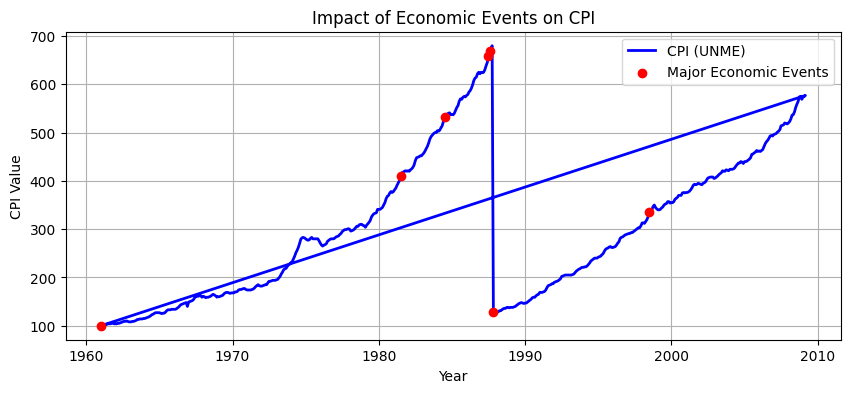

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["CPI_UNME"], label="CPI (UNME)", color="blue", linewidth=2)
plt.scatter(significant_events.index, significant_events["CPI_UNME"], color="red", label="Major Economic Events",
            zorder=3)
plt.xlabel("Year")
plt.ylabel("CPI Value")
plt.title("Impact of Economic Events on CPI")
plt.legend()
plt.grid(True)
plt.show()

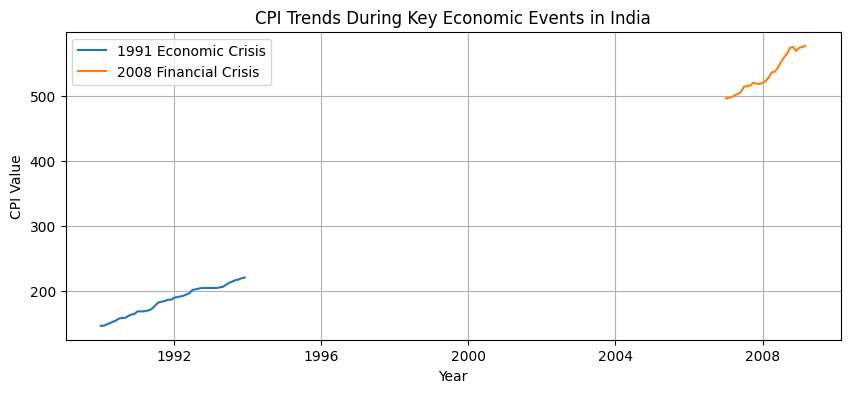

In [ ]:
plt.figure(figsize=(10, 4))
for event, (start_year, end_year) in event_periods.items():
    event_data = df[(df.index.year >= start_year) & (df.index.year <= end_year)]
    plt.plot(event_data.index, event_data["CPI_UNME"], label=event)

plt.xlabel("Year")
plt.ylabel("CPI Value")
plt.title("CPI Trends During Key Economic Events in India")
plt.legend()
plt.grid(True)
plt.show()